# L0 - Why Deep Learning: Intro to Convolutions

Course Link: http://course.fast.ai/lessons/lesson0.html
Code: https://github.com/fastai/courses/blob/master/deeplearning1/nbs/convolution-intro.ipynb

- Deep Learning is a way of machine learning
- Three part of machine learning
    - Infinitely Flexible functioe
    - All-purpose parametre fitting
    - Fast and Scalabe
- Deep Learning Possiblity: Generative Image Models, Neural Pupperty
- Its possible to train deep learning model with high accuracy with a curated training set
- All you can do its set up a the situation that a deep learning model learns
- All image recognistion today uses convolutional neural netwoks
- You can make a layered model better by not weight each layer the same


In [17]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
from scipy.ndimage import imread
from skimage.measure import block_reduce
import pickle
from scipy.ndimage.filters import correlate, convolve
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [18]:
# loading in the data

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")
images, labels = mnist.train.images, mnist.train.labels
images = images.reshape((55000,28,28))
np.savez_compressed("MNIST_data/train", images=images, labels=labels)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [42]:
def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

In [35]:
data = np.load('MNIST_data/train.npz')
images=data['images']
labels=data['labels']
n=len(images)
images.shape

(55000, 28, 28)

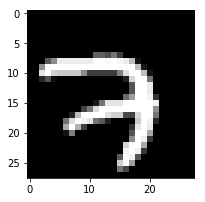

In [36]:
plot(images[0])

In [37]:
labels[0]

7

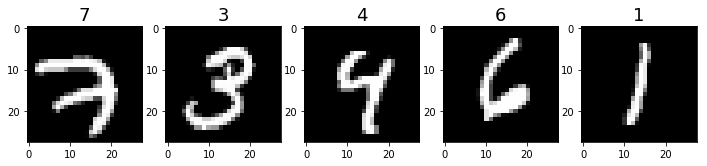

In [43]:
plots(images[:5], titles=labels[:5])

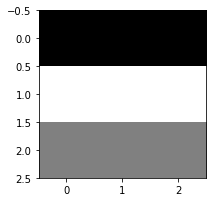

In [45]:
top=[[-1,-1,-1],[1,1,1],[0,0,0]]
plot(top)

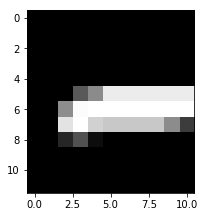

In [60]:
r=(0,28)
def zoomim(x1=0,x2=28,y1=0,y2=28):
    plot(images[0,y1:y2,x1:x2])
w=interactive(zoomim, x1=r,x2=r,y1=r,y2=r)
w

In [76]:
# printing out the value of each pixel of the view above 
k = w.kwargs
dims = np.index_exp[k['y1']:k['y2']:1,k['x1']:k['x2']]
images[0][dims]

array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.3529,  0.5412,  0.9216,  0.9216,  0.9216,  0.9216,  0.9216,
         0.9216],
       [ 0.    ,  0.    ,  0.549 ,  0.9843,  0.9961,  0.9961,  0.9961,  0.9961,  0.9961,  0.9961,
         0.9961],
       [ 0.    ,  0.    ,  0.8863,  0.9961,  0.8157,  0.7804,  0.7804,  0.7804,  0.7804,  0.5451,
         0.2392],
       [ 0.    ,  0.    ,  0.149 ,  0.3216,  0.051 ,  0.    ,  0.    ,  

In [77]:
corrtop =  correlate(images[0],top)

In [78]:
corrtop[dims]

array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.3804],
       [ 0.    ,  0.    ,  0.3529,  0.8941,  1.8157,  2.3843,  2.7647,  2.7647,  2.7647,  2.7647,
         2.4471],
       [ 0.    ,  0.549 ,  1.1804,  1.6353,  1.1608,  0.6039,  0.2235,  0.2235,  0.2235,  0.2235,
         0.1608],
       [ 0.    ,  0.3373,  0.349 ,  0.1686, -0.3843, -0.6118, -0.6471, -0.6471, -0.8824, -1.4235,
        -1.9647],
       [ 0.    , -0.7373, -1.4118, -2.1765, -2.2196, -2.3255, -2.3412, -

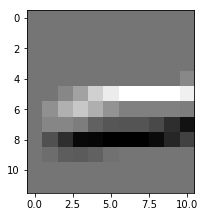

In [79]:
plot(corrtop[dims])

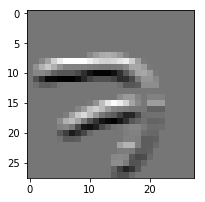

In [71]:
plot(corrtop)

In [80]:
np.rot90(top, 1)

array([[-1,  1,  0],
       [-1,  1,  0],
       [-1,  1,  0]])

True

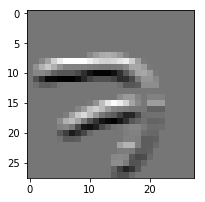

In [81]:
convtop = convolve(images[0],np.rot90(top,2))
plot(convtop)
np.allclose(convtop, corrtop)

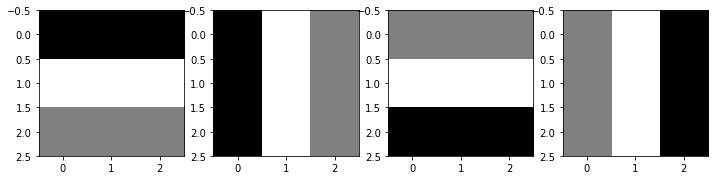

In [84]:
straights = [np.rot90(top, i) for i in range (4)]
plots(straights)

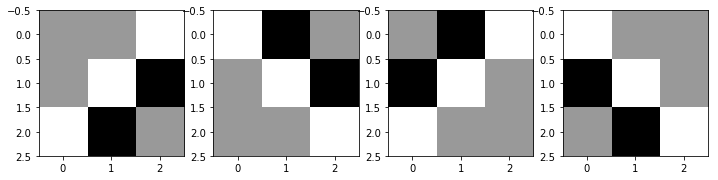

In [86]:
br =[[0,0,1], 
     [0,1,-1.5],
     [1,-1.5,0]]
     
diags = [np.rot90(br, i) for i in range(4)]
plots(diags)

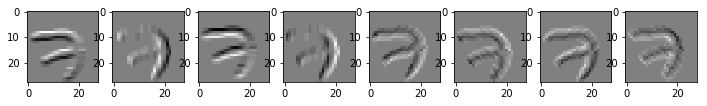

In [87]:
rots = straights + diags
corrs = [correlate(images[0],rot) for rot in rots]
plots(corrs)

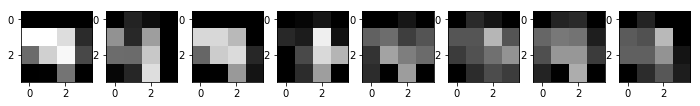

In [90]:
def pool (im): return block_reduce(im, (7,7), np.max)

plots([pool(im) for im in corrs])

In [94]:
eights=[images[i] for i in range(n) if labels[i]==8]
ones=[images[i] for i in range(n) if labels[i]==1]

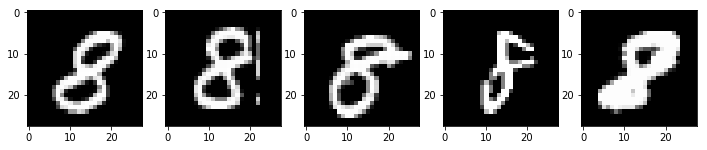

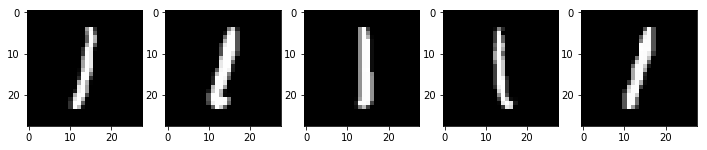

In [95]:
plots(eights[:5])
plots(ones[:5])

In [96]:
pool8 = [np.array([pool(correlate(im, rot)) for im in eights]) for rot in rots]

In [98]:
len(pool8), pool8[0].shape

(8, (5389, 4, 4))

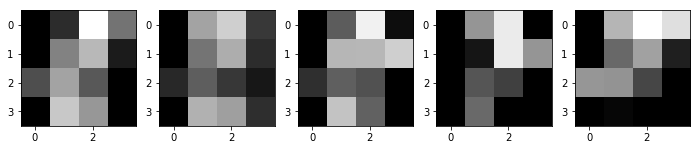

In [100]:
# First 5 8"s after max pooling for the top edget of each 8 image
plots(pool8[0][0:5])

In [101]:
def normalize(arr): return (arr-arr.mean())/arr.std()

In [104]:
# Show the average of the each martix section from the entire sample of 8s
filts8 = np.array([ims.mean(axis=0) for ims in pool8])
filts8 = normalize(filt8)

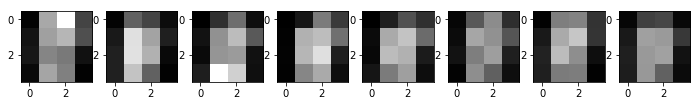

In [111]:
plots(filts8)

In [119]:
pool1 = [np.array([pool(correlate(im, rot))for im in ones]) for rot in rots]
filts1 = np.array([ims.mean(axis=0) for ims in pool1])
filts1 = normalize(filts1)

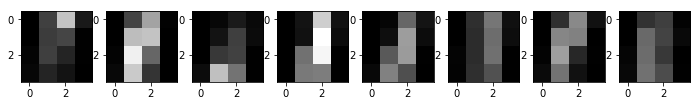

In [120]:
# Show the average of the each martix section from the entire sample of 1s
plots(filts1)

In [106]:
def pool_corr(im): return np.array([pool(correlate(im,rot)) for rot in rots])

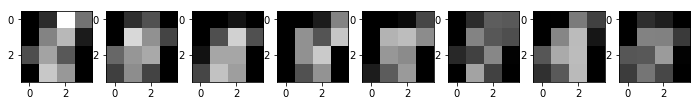

In [107]:
# Take the first image of 8 from the sample and see how well its correlates with our model 
plots(pool_corr(eights[0]))

In [129]:
# creating the classification function to categories the 1s and 8s into 2 categories
def see(a,b): return ((a-b)**2).sum()
def is8_n2(im): return 1 if see(pool_corr(im), filts1) > see(pool_corr(im),filts8) else 0

In [130]:
# running the model thes first image of 8
see(pool_corr(eights[0]), filts8), see(pool_corr(eights[0]), filts1)

(126.77776, 181.26105)

In [131]:
#  Partial Classification Matrix: Is the image in the sample an 8
[np.array([is8_n2(im) for im in ims]).sum() for ims in [eights,ones]]

[5223, 287]

In [132]:

# Partial Classification Matrix: Is the image in the sample not an 8
[np.array([(1-is8_n2(im)) for im in ims]).sum() for ims in [eights,ones]]

[166, 5892]

In [142]:
def n1(a,b): return (np.fabs(a-b)).sum()
def is8_n1(im): return 1 if n1(pool_corr(im),filts1) > n1(pool_corr(im),filts8) else 0

In [143]:
#  Partial Classification Matrix: Is the image in the sample an 1
[np.array([is8_n1(im) for im in ims]).sum() for ims in [eights,ones]]

[5129, 254]

In [144]:
# Partial Classification Matrix: Is the image in the sample not an 1
[np.array([(1-is8_n1(im)) for im in ims]).sum() for ims in [eights,ones]]

[260, 5925]

# SGD Intro

In [145]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [147]:
def lin(a,b,x): return a*b+x

In [148]:
a = 3
b = 8

In [157]:
n =30
x = random(n)
y = lin(a,b,x)

In [158]:
x

array([ 0.1009,  0.9765,  0.1457,  0.7836,  0.0318,  0.6152,  0.3813,  0.4473,  0.4378,  0.605 ,
        0.1792,  0.7431,  0.2979,  0.1747,  0.9037,  0.4912,  0.6117,  0.1604,  0.4507,  0.3668,
        0.4341,  0.0586,  0.0104,  0.6571,  0.3224,  0.4406,  0.1032,  0.7307,  0.5352,  0.5693])

In [159]:
y

array([ 24.1009,  24.9765,  24.1457,  24.7836,  24.0318,  24.6152,  24.3813,  24.4473,  24.4378,
        24.605 ,  24.1792,  24.7431,  24.2979,  24.1747,  24.9037,  24.4912,  24.6117,  24.1604,
        24.4507,  24.3668,  24.4341,  24.0586,  24.0104,  24.6571,  24.3224,  24.4406,  24.1032,
        24.7307,  24.5352,  24.5693])

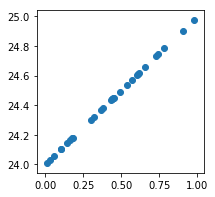

In [160]:
plt.scatter(x,y)

In [161]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [162]:
a_guess=-1
b_guess=1
avg_loss(y, a_guess, b_guess, x)

25.0000

In [165]:
lr = 0.01

In [166]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2*(y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [171]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

RuntimeError: No MovieWriters available!